# HW8 (60 points possible)

This homework also needs winequality-red.csv, which you can find at the same place you found this homework or at the UCI Machine Learning repository (https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/)

# Problem 1:  Scraping Rotten Tomatoes (20 points)

Rotten Tomatoes is a website that aggregates movie critic reviews.  Use the requests module to get the Rotten Tomatoes review site for *Star Wars:  A New Hope*, at URL https://www.rottentomatoes.com/m/star_wars_a_new_hope/reviews?intcmp=rt-scorecard_tomatometer-reviews .  Then use Beautiful Soup to extract all "p" tags with a class of "review-text".  Use Beautiful Soup's get_text() method to remove the tags from these text snippets, and finally, use the TextBlob class to print a Sentiment for each sentence, separated from the sentence itself by '::'.

For example, the expected output for one review would be:  "Star Wars is the best science fiction film that’s come down the pike to date.::Sentiment(polarity=0.4222222222222222, subjectivity=0.29444444444444445)
And every good thing you’ve heard about it is true.::Sentiment(polarity=0.5249999999999999, subjectivity=0.625)"

In [58]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob

pages = requests.get('https://www.rottentomatoes.com/m/star_wars_a_new_hope/reviews?intcmp=rt-scorecard_tomatometer-reviews')

soup = BeautifulSoup(pages.text, 'html.parser')
reviews = soup.find_all('p', class_ = 'review-text')

for review in reviews:
  texts = review.get_text()
  blob = TextBlob(texts)
  for data in blob.sentences:
        print(str(data) + "::" + str(data.sentiment))
# TODO

Part of its appeal is as a boy’s own adventure set against a vast, dangerous cosmos – but the characters’ resistance to tyranny also accommodates much grounded critique of 20th-century US imperialism.::Sentiment(polarity=0.05, subjectivity=0.775)
It’s mindless fun while it lasts.::Sentiment(polarity=0.04999999999999999, subjectivity=0.55)
It scoots along as impatiently and recklessly as Luke himself.::Sentiment(polarity=-0.2, subjectivity=0.9)
“Star Wars” was a rare phenomenon that blossomed into a beloved franchise whose popularity and influence can be seen across the globe regardless of age.::Sentiment(polarity=0.5, subjectivity=0.95)
Star Wars is the best science fiction film that’s come down the pike to date.::Sentiment(polarity=0.4222222222222222, subjectivity=0.29444444444444445)
And every good thing you’ve heard about it is true.::Sentiment(polarity=0.5249999999999999, subjectivity=0.625)
The greatest kids' picture for adults since "The Wizard of Oz."::Sentiment(polarity=1.0, su

# Problem 2:  Price of Milk Interpolation (10 points)

The following y values represent the average price of a gallon of milk for each year. (Source: https://www.usinflationcalculator.com/inflation/milk-prices-adjusted-for-inflation/) Perform linear regression with scikit-learn's LinearRegression class.  Then plot the points alongside the linear fit.  And finally, make a prediction for 2023 with this linear model.

In [15]:
import numpy as np
x = np.linspace(1995, 2021, 27)
y = [2.48, 2.62, 2.61, 2.70, 2.84,
     2.78, 2.88, 2.76, 2.76, 3.16, 3.19, 3.08, 3.50, 3.80, 3.11,
     3.26, 3.57, 3.49, 3.46, 3.69, 3.42, 3.20, 3.23, 2.90, 3.04,
     3.32, 3.55]

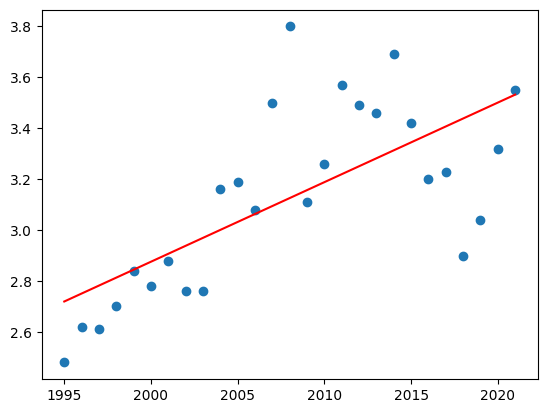

In [22]:
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

linear_model = LinearRegression()
plt.plot(x,y,'o')
x = x.reshape(-1,1)
linear_model.fit(x,y)
y_hat = linear_model.predict(x)
plt.plot(x, y_hat, 'r')
# TODO linear regression and plot

In [70]:
xpred = np.array([2023]).reshape(-1, 1)
ypred = linear_model.fit(x,y).predict(xpred)
ypred[0]
# TODO Prediction for 2023

3.594790394790401

# Problem 3:  Text Processing (10 points)

Write a function just_verbs() that takes a string as an argument, and returns a list of the verbs in the sentence.  (Note that the tags returned in the .tags attribute of a TextBlob start with 'VB' for verbs.)

In [29]:
from textblob import TextBlob
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [62]:
def just_verbs(sentence):
  sentence1 = TextBlob(sentence)
  sentence2 = sentence1.tags
  list1 = []
  for word,label in sentence2:
    if label == 'VBD':
      list1.append(word)
  return list1
# TODO just_verbs()

In [63]:
# Test - should produce ['jumped', 'sang']
just_verbs('I jumped and sang')

['jumped', 'sang']

# Problem 4:  Seaborn (10 points)

Download the winequality-red.csv file and upload it to Google colab.  Then, draw a 4-dimensional scatterplot of the data using the following features (which were the most important in predicting quality according to our random forests homework):  alcohol for the x-axis, quality for the y-axis, volatile acidity for the hue, and sulphates for the size.  Set the sizes parameter to (10,400) to make those more visible.  You don't need to change the colormap or other defaults not mentioned here.

In [50]:
from google.colab import files

uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [51]:
import pandas as pd

df = pd.read_csv('winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


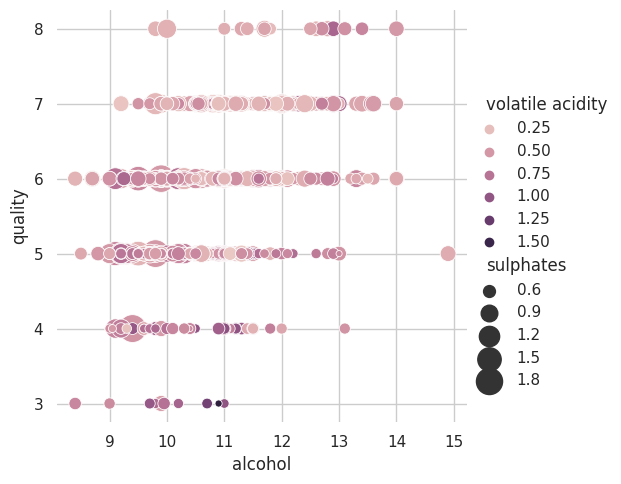

In [52]:
import seaborn as sns

sns.set_theme(style="whitegrid")

g = sns.relplot(
    data=df,
    x='alcohol', y='quality',
    hue='volatile acidity', size='sulphates', sizes=(10,400),
)
g.despine(left=True, bottom=True)
# TODO Seaborn plot

# Problem 5:  Graphs and Centrality (10 points)

The following code defines an undirected graph using an adjacency list representation.  Calculate the closeness centrality of node A and the closeness centrality of node B.  (You don't need to run breadth-first search to find the closest paths - just draw the graph and look at it to determine shortest path lengths.)

In [53]:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C', 'E'],
    'E': ['D']
}

In [67]:
closeness = (4/((2*1)+(1*3)+(1*2)))
print(closeness)
# TODO Compute closeness centrality of A here

0.5714285714285714


In [69]:
closeness2 = (4/((1*3)+(1*2)))
print(closeness2)
# TODO Compute closeness centrality of B here

0.8
